## Домашнее задание "Линейная алгебра. Векторы"

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

### Уровень 0:

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)  
Надо:  
Изобразить вектора на экране  
Изобразить точку x + y + z  
Найти угол между векторами x и y

Зададим вектора с помощью np.array

In [56]:
x = np.array((1,1))
y = np.array((2,0))
z = np.array((0,2))

In [76]:
q = x + y + z

In [77]:
q

array([3, 3])

##### Изобразим вектора x, y , z и точку x + y + z на экране

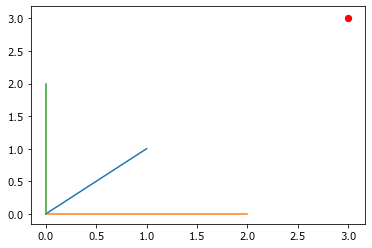

In [82]:
plt.plot([0, x[0]],[0, x[1]]) # вектор x
plt.plot([0, y[0]],[0, y[1]]) # вектор y
plt.plot([0, z[0]],[0, z[1]]) # вектор z
plt.scatter(q[0], q[1], color='red', s=40, marker='o') # маркер суммарного вектора q

##### Найдём угол между векторами x и y

In [176]:
import math
x = np.array((1,1))
y = np.array((2,0))
dotxy = np.dot(x,y)
cosa = math.acos((dotxy)/(math.sqrt(x[0]**2+x[1]**2)*math.sqrt(y[0]**2+y[1]**2)))*(180.0/np.pi)
deg = u'\xb0'
print('Угол между векторами x и y равен {0:.1f}'.format(cosa), deg)

Угол между векторами x и y равен 45.0 °


или:

In [101]:
dotxy = x@y
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
angle_xy = math.acos(dotxy/(norm_x * norm_y))*(180.0/np.pi)
angle_xy = np.around(angle_xy, decimals = 1)
deg = u'\xb0'
print('Угол между векторами x и y равен {}'.format(angle_xy), deg)

Угол между векторами x и y равен 45.0 °


---

##### Понравились  две ссылки в интернете по отображению векторов, в первом случае поиграл с кодом в одном из примеров.

1. [Использование библиотеки Matplotlib. Как рисовать стрелки на графиках и добавлять аннотации](https://jenyay.net/Matplotlib/Annotation)

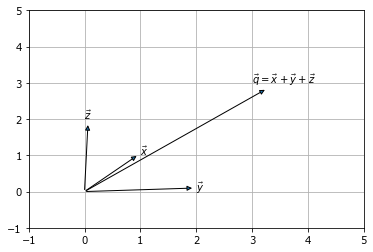

In [177]:
#-*- coding: UTF-8 -*-

import pylab
#import numpy


if __name__ == '__main__':
    pylab.rc('font', family = 'verdana')
    pylab.xlim ([-1, 5])
    pylab.ylim ([-1, 5])

    x = np.array ([1, 1])
    y = np.array ([2, 0])
    z = np.array ([0, 2])

    q = x + y + z

    arrowprops = {
        'arrowstyle': '<|-',
    }

    # !!! Добавление аннотации
    pylab.annotate (u'$\\vec x$',
                    xy=(0, 0),
                    xytext = x,
                    arrowprops = arrowprops)

    pylab.annotate (u'$\\vec y$',
                    xy=(0, 0),
                    xytext = y,
                    arrowprops = arrowprops)
    
    pylab.annotate (u'$\\vec z$',
                    xy=(0, 0),
                    xytext = z,
                    arrowprops = arrowprops)
    
    pylab.annotate (u'$\\vec q = \\vec x + \\vec y + \\vec z$',
                    xy=(0, 0),
                    xytext = q,
                    arrowprops = arrowprops)

    # Покажем окно с нарисованным графиком
    pylab.grid()
    pylab.show()

Вот ещё интересная ссылка, используется  [axes.quiver](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.quiver.html):  
2. [Как нарисовать несколько векторов, определенных с массивами координат в Python?](https://issue.life/questions/42575703)  
Отображение с помощью стрелок происходит, можно рисовать градиентные поля.

---

### Уровень 1:

Даны дома из Бостона  
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)  
Написать код разложения дома по указанному базису

Загрузим учебный датасет о ценах на дома в Бостоне.

In [117]:
from sklearn.datasets import load_boston
import pandas as pd
data =  pd.read_csv(load_boston()['filename'], skiprows=1)

In [120]:
data.shape

(506, 14)

In [121]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [123]:
df = data.loc[:, data.columns != 'MEDV'] #data.drop('MEDV', axis = 1)

In [178]:
df.shape

(506, 13)

In [124]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [125]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
Возьмём несколько домов и покажем таблицу.

In [135]:
n = 13
df.sample(n)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
302,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329,16.1,383.61,8.67
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55
63,0.12650,25.0,5.13,0,0.453,6.762,43.4,7.9809,8,284,19.7,395.58,9.50


Возьмём ещё раз другие 13 домов и перейдём из табличного представления в работу с массивами.

In [136]:
n = 13
Houses = df.sample(n)
Hsvs = Houses.values
Hsvs

array([[6.04700e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        6.15300e+00, 6.88000e+01, 3.27970e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.87110e+02, 1.31500e+01],
       [7.87500e-02, 4.50000e+01, 3.44000e+00, 0.00000e+00, 4.37000e-01,
        6.78200e+00, 4.11000e+01, 3.78860e+00, 5.00000e+00, 3.98000e+02,
        1.52000e+01, 3.93870e+02, 6.68000e+00],
       [6.80117e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.08100e+00, 8.44000e+01, 2.71750e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 1.47000e+01],
       [1.27346e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 6.05000e-01,
        6.25000e+00, 9.26000e+01, 1.79840e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.38920e+02, 5.50000e+00],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, 0.00000e+00, 5.07000e-01,
        6.08600e+00, 6.15000e+01, 3.65190e+00, 8.00000e+00, 3.07000e+02,
        1.74000e+01, 3.76750e+02, 1.08800e+01],
       [3.76619e+01, 0.00000e+

In [138]:
Houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
185,0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15
187,0.07875,45.0,3.44,0,0.4370,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
459,6.80117,0.0,18.10,0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70
160,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50
235,0.33045,0.0,6.20,0,0.5070,6.086,61.5,3.6519,8,307,17.4,376.75,10.88
427,37.66190,0.0,18.10,0,0.6790,6.202,78.7,1.8629,24,666,20.2,18.82,14.52
129,0.88125,0.0,21.89,0,0.6240,5.637,94.7,1.9799,4,437,21.2,396.90,18.34
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73
368,4.89822,0.0,18.10,0,0.6310,4.970,100.0,1.3325,24,666,20.2,375.52,3.26


In [139]:
Hsvs

array([[6.04700e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        6.15300e+00, 6.88000e+01, 3.27970e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.87110e+02, 1.31500e+01],
       [7.87500e-02, 4.50000e+01, 3.44000e+00, 0.00000e+00, 4.37000e-01,
        6.78200e+00, 4.11000e+01, 3.78860e+00, 5.00000e+00, 3.98000e+02,
        1.52000e+01, 3.93870e+02, 6.68000e+00],
       [6.80117e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.08100e+00, 8.44000e+01, 2.71750e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 1.47000e+01],
       [1.27346e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 6.05000e-01,
        6.25000e+00, 9.26000e+01, 1.79840e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.38920e+02, 5.50000e+00],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, 0.00000e+00, 5.07000e-01,
        6.08600e+00, 6.15000e+01, 3.65190e+00, 8.00000e+00, 3.07000e+02,
        1.74000e+01, 3.76750e+02, 1.08800e+01],
       [3.76619e+01, 0.00000e+

**Мы выбрали 13 домов, потому что мы работаем с 13 атрибутами.**  

In [142]:
np.linalg.det(Hsvs)

1711934726637.093

Детерминант матрицы 13 * 13 не равен нулю, значит можно использовать эти 13 домов в качестве **базиса**.

Возьмём любой произвольный дом, отличный от того, что представлен в базисе. А если он и был бы представлен в базисе, то коэффициент при соответствующем векторе (доме) был бы единицей.

In [162]:
House111 = df.iloc[111].values

In [163]:
House111

array([1.0084e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01,
       6.7150e+00, 8.1600e+01, 2.6775e+00, 6.0000e+00, 4.3200e+02,
       1.7800e+01, 3.9559e+02, 1.0160e+01])

Чтобы разложить наш вектор-дом House111 по базису домов Hsvs надо решить уравнение A*x=b,
где A = Hsvs, b = House111, coeff = x - искомые коэффициенты разложения вектора b по базису.

In [ ]:
Окончательно, получим:

In [166]:
coeff = np.linalg.solve(Hsvs,House111)
coeff

array([ 6.41490416e+01, -1.10176227e+01, -4.30868781e+00,  7.58307594e+01,
       -3.27360055e+03, -1.53666360e+02,  4.91485889e+00,  5.39121055e+01,
       -3.27017816e+01,  2.11156971e+00, -4.42812303e+00,  5.30312390e+00,
       -1.89056909e+01])